<a href="https://colab.research.google.com/github/gerardpro12303/AI/blob/main/Copy_of_Untitled5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install scikit-learn xgboost pandas

In [3]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report

In [4]:
import pandas as pd
import numpy as np

# Number of samples
num_samples = 1000

# Set seed for reproducibility
np.random.seed(42)

# Generate glucose readings with lower values for non-diabetics
glucose_readings = np.random.randint(70, 200, size=num_samples)

# Generate symptoms randomly
frequent_urination = np.random.choice([0, 1], size=num_samples)
fatigue = np.random.choice([0, 1], size=num_samples)
blurred_vision = np.random.choice([0, 1], size=num_samples)

# Generate new features
age = np.random.randint(20, 80, size=num_samples)  # Age between 20 and 80
diet_quality = np.random.choice(["Poor", "Average", "Good"], size=num_samples, p=[0.3, 0.4, 0.3])  # Diet distribution
gender = np.random.choice(["Male", "Female"], size=num_samples)  # Randomly assign gender

# Determine if the patient is suspected of diabetes
suspected = (
    (glucose_readings >= 140) |
    ((frequent_urination + fatigue + blurred_vision) >= 2) |
    ((age > 50) & (diet_quality == "Poor"))  # Higher risk if older with poor diet
)

# Assign labels
diabetes_status = np.where(suspected, "Suspected", "Non")

# Generate other features
data = {
    "Family_History": np.random.choice([0, 1], size=num_samples),
    "Glucose_Reading": glucose_readings,
    "Frequent_Urination": frequent_urination,
    "Fatigue": fatigue,
    "Blurred_Vision": blurred_vision,
    "Age": age,
    "Diet_Quality": diet_quality,
    "Gender": gender,  # ✅ Now properly defined
    "Diabetes_Status": diabetes_status,
}

# Create DataFrame
df = pd.DataFrame(data)

# Save dataset
df.to_csv("synthetic_diabetes_status.csv", index=False)

# Display first few rows
print(df.head())




   Family_History  Glucose_Reading  Frequent_Urination  Fatigue  \
0               0              172                   0        1   
1               1              162                   1        1   
2               0               84                   0        1   
3               1              176                   0        1   
4               1              141                   0        1   

   Blurred_Vision  Age Diet_Quality  Gender Diabetes_Status  
0               1   76      Average  Female       Suspected  
1               1   70      Average  Female       Suspected  
2               0   69      Average    Male             Non  
3               1   36         Poor    Male       Suspected  
4               0   70      Average    Male       Suspected  


In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


In [6]:
# Load dataset
df = pd.read_csv("synthetic_diabetes_status.csv")

# Display first few rows
print(df.head())


   Family_History  Glucose_Reading  Frequent_Urination  Fatigue  \
0               0              172                   0        1   
1               1              162                   1        1   
2               0               84                   0        1   
3               1              176                   0        1   
4               1              141                   0        1   

   Blurred_Vision  Age Diet_Quality  Gender Diabetes_Status  
0               1   76      Average  Female       Suspected  
1               1   70      Average  Female       Suspected  
2               0   69      Average    Male             Non  
3               1   36         Poor    Male       Suspected  
4               0   70      Average    Male       Suspected  


In [7]:
df["Diabetes_Status"] = df["Diabetes_Status"].map({"Non": 0, "Suspected": 1})


Diabetes_Status
1    762
0    238
Name: count, dtype: int64


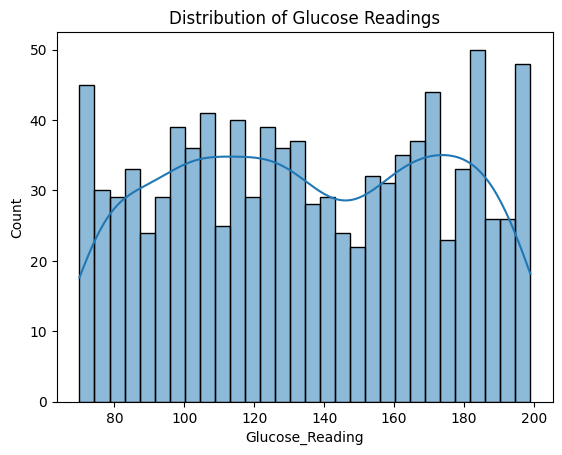

In [8]:
# Check class distribution
print(df["Diabetes_Status"].value_counts())

# Visualize glucose levels
sns.histplot(df["Glucose_Reading"], bins=30, kde=True)
plt.title("Distribution of Glucose Readings")
plt.show()


In [9]:
# Define features (X) and target (y)
X = df.drop(columns=["Diabetes_Status"])  # All features except target
y = df["Diabetes_Status"]  # Target variable

# Split data into training (80%) and testing (20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [10]:
print(X_train.dtypes)


Family_History         int64
Glucose_Reading        int64
Frequent_Urination     int64
Fatigue                int64
Blurred_Vision         int64
Age                    int64
Diet_Quality          object
Gender                object
dtype: object


In [11]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
X_train["Diet_Quality"] = le.fit_transform(X_train["Diet_Quality"])
X_test["Diet_Quality"] = le.transform(X_test["Diet_Quality"])  # Use same mapping


In [12]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer

# Define categorical columns
categorical_features = ["Gender", "Diet_Quality"]

# Apply One-Hot Encoding using ColumnTransformer
column_transformer = ColumnTransformer(
    transformers=[("cat", OneHotEncoder(drop="first"), categorical_features)],
    remainder="passthrough"
)

# Fit and transform training data
X_train_encoded = column_transformer.fit_transform(X_train)
X_test_encoded = column_transformer.transform(X_test)

# Get transformed column names
encoded_feature_names = column_transformer.get_feature_names_out()

# Convert transformed data back to DataFrame
X_train = pd.DataFrame(X_train_encoded, columns=encoded_feature_names)
X_test = pd.DataFrame(X_test_encoded, columns=encoded_feature_names)

# Apply StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Convert scaled data back to DataFrame
X_train = pd.DataFrame(X_train_scaled, columns=encoded_feature_names)
X_test = pd.DataFrame(X_test_scaled, columns=encoded_feature_names)


In [13]:
# Initialize the model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model
rf_model.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

In [23]:
# Predict on test data
y_pred = rf_model.predict(X_test)


In [24]:
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy:.2f}")


Model Accuracy: 0.98


In [25]:
print("Classification Report:")
print(classification_report(y_test, y_pred))


Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.97      0.96        34
           1       0.99      0.99      0.99       166

    accuracy                           0.98       200
   macro avg       0.97      0.98      0.97       200
weighted avg       0.99      0.98      0.99       200



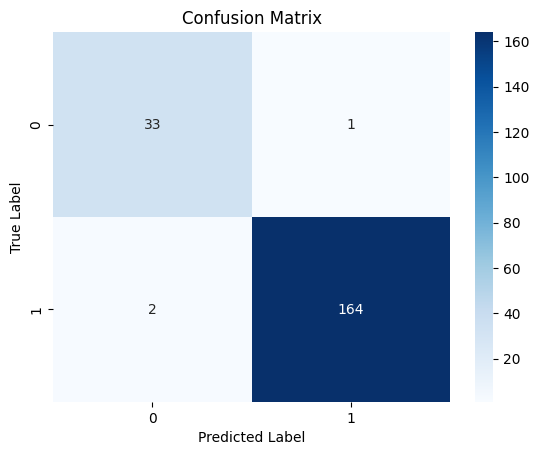

In [26]:
# Visualize confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()


In [30]:
# Example real-world patient data (adjust values as needed)
real_world_sample = pd.DataFrame({
    "Family_History": [1],       # Has family history of diabetes
    "Glucose_Reading": [135],    # Mid-range glucose level
    "Frequent_Urination": [1],   # Experiencing frequent urination
    "Fatigue": [0],              # No fatigue
    "Blurred_Vision": [1],       # Blurred vision
    "Age": [45],                 # Age of the patient
    "Diet_Quality": ["Poor"],    # Poor diet quality
    "Gender": ["Male"]           # Include Gender (to match training data)
})

# Apply the same ColumnTransformer used during training
real_world_sample_encoded = column_transformer.transform(real_world_sample)

# Scale the data using the previously fitted scaler
real_world_sample_scaled = scaler.transform(real_world_sample_encoded)

# Display processed sample
print(real_world_sample_scaled)



ValueError: Found unknown categories ['Poor'] in column 1 during transform

In [31]:
# Apply the same scaling transformation used during training
real_world_sample_scaled = scaler.transform(real_world_sample)


ValueError: The feature names should match those that were passed during fit.
Feature names unseen at fit time:
- Age
- Blurred_Vision
- Diet_Quality
- Family_History
- Fatigue
- ...
Feature names seen at fit time, yet now missing:
- cat__Diet_Quality_1
- cat__Diet_Quality_2
- cat__Gender_Male
- remainder__Age
- remainder__Blurred_Vision
- ...


In [32]:
# Predict the label (0 = "Non", 1 = "Suspected")
prediction = rf_model.predict(real_world_sample_scaled)

# Convert prediction back to label
label_mapping = {0: "Non", 1: "Suspected"}
predicted_label = label_mapping[prediction[0]]

print(f"Predicted Diabetes Status: {predicted_label}")


NameError: name 'real_world_sample_scaled' is not defined

In [33]:
# Get prediction probabilities
prediction_proba = rf_model.predict_proba(real_world_sample_scaled)
print(f"Prediction Confidence: {prediction_proba}")


NameError: name 'real_world_sample_scaled' is not defined

In [34]:
# Create a DataFrame with multiple real-world cases
real_world_cases = pd.DataFrame({
    "Family_History": [1, 0, 1, 0, 1, 1],
    "Glucose_Reading": [85, 145, 180, 95, 200, 100],  # Varying glucose levels
    "Frequent_Urination": [0, 1, 1, 0, 1, 0],
    "Fatigue": [0, 1, 1, 0, 1, 1],
    "Blurred_Vision": [0, 1, 1, 0, 1, 1]
})

print("Real-world cases:\n", real_world_cases)


Real-world cases:
    Family_History  Glucose_Reading  Frequent_Urination  Fatigue  \
0               1               85                   0        0   
1               0              145                   1        1   
2               1              180                   1        1   
3               0               95                   0        0   
4               1              200                   1        1   
5               1              100                   0        1   

   Blurred_Vision  
0               0  
1               1  
2               1  
3               0  
4               1  
5               1  


In [35]:
# Scale the new samples using the same scaler
real_world_cases_scaled = scaler.transform(real_world_cases)

# Get predictions and confidence scores
predictions = rf_model.predict(real_world_cases_scaled)
predictions_proba = rf_model.predict_proba(real_world_cases_scaled)

# Convert numerical predictions to labels
label_mapping = {0: "Non", 1: "Suspected"}
predicted_labels = [label_mapping[pred] for pred in predictions]

# Display results
for i, (pred, proba) in enumerate(zip(predicted_labels, predictions_proba)):
    print(f"Patient {i+1}: Predicted = {pred}, Confidence = {proba}")


ValueError: The feature names should match those that were passed during fit.
Feature names unseen at fit time:
- Blurred_Vision
- Family_History
- Fatigue
- Frequent_Urination
- Glucose_Reading
Feature names seen at fit time, yet now missing:
- cat__Diet_Quality_1
- cat__Diet_Quality_2
- cat__Gender_Male
- remainder__Age
- remainder__Blurred_Vision
- ...


In [36]:
import pandas as pd

# Create a DataFrame with real-world-inspired patient cases
real_world_cases = pd.DataFrame({
    "Family_History": [1, 0, 1, 1, 0, 1, 0, 0, 1, 1],
    "Glucose_Reading": [180, 95, 150, 130, 85, 200, 110, 140, 160, 175],
    "Frequent_Urination": [1, 0, 1, 1, 0, 1, 0, 1, 1, 1],
    "Fatigue": [1, 0, 1, 0, 1, 1, 0, 1, 1, 1],
    "Blurred_Vision": [1, 0, 1, 1, 0, 1, 0, 1, 1, 1],
    "Age": [45, 30, 55, 60, 25, 70, 40, 35, 65, 50],

})

# Display the dataset
print(real_world_cases)


   Family_History  Glucose_Reading  Frequent_Urination  Fatigue  \
0               1              180                   1        1   
1               0               95                   0        0   
2               1              150                   1        1   
3               1              130                   1        0   
4               0               85                   0        1   
5               1              200                   1        1   
6               0              110                   0        0   
7               0              140                   1        1   
8               1              160                   1        1   
9               1              175                   1        1   

   Blurred_Vision  Age  
0               1   45  
1               0   30  
2               1   55  
3               1   60  
4               0   25  
5               1   70  
6               0   40  
7               1   35  
8               1   65  
9           

In [37]:
# Add Diet_Quality categories (adjust values based on real cases)
real_world_cases["Diet_Quality_Good"] = [1, 0, 1, 0, 0, 1, 0, 1, 0, 1]
real_world_cases["Diet_Quality_Poor"] = [0, 1, 0, 1, 1, 0, 1, 0, 1, 0]
real_world_cases["Diet_Quality"] = [0, 0, 0, 0, 1, 0, 0, 0, 0, 0]


In [38]:
# Ensure the same order of features as in training
features_used_in_training = ["Family_History", "Glucose_Reading", "Frequent_Urination",
                             "Fatigue", "Blurred_Vision", "Age", "Diet_Quality"]

real_world_cases_scaled = real_world_cases.copy()
real_world_cases_scaled[features_used_in_training] = scaler.transform(real_world_cases[features_used_in_training])


ValueError: The feature names should match those that were passed during fit.
Feature names unseen at fit time:
- Age
- Blurred_Vision
- Diet_Quality
- Family_History
- Fatigue
- ...
Feature names seen at fit time, yet now missing:
- cat__Diet_Quality_1
- cat__Diet_Quality_2
- cat__Gender_Male
- remainder__Age
- remainder__Blurred_Vision
- ...


In [39]:
predictions = rf_model.predict(real_world_cases_scaled.to_numpy())
predictions_proba = rf_model.predict_proba(real_world_cases_scaled.to_numpy())






/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [40]:
# Ensure we use only the original training features
features_used_in_training = ["Family_History", "Glucose_Reading", "Frequent_Urination",
                             "Fatigue", "Blurred_Vision", "Age", "Diet_Quality"]

real_world_cases_scaled = real_world_cases_scaled[features_used_in_training]

# Convert to NumPy array before prediction to avoid the warning
predictions = rf_model.predict(real_world_cases_scaled.to_numpy())
predictions_proba = rf_model.predict_proba(real_world_cases_scaled.to_numpy())

print("Predictions:", predictions)
print("Prediction Confidence:", predictions_proba)


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


ValueError: X has 7 features, but RandomForestClassifier is expecting 9 features as input.

In [ ]:
new_patient = pd.DataFrame({
    "Family_History": [1],
    "Glucose_Reading": [70],
    "Frequent_Urination": [0],
    "Fatigue": [0],
    "Blurred_Vision": [0],
    "Age": [60],
    "Diet_Quality": ["0"]
})


# Scale the new patient data
new_patient_scaled = scaler.transform(new_patient)

# Make a prediction
prediction = rf_model.predict(new_patient_scaled)
prediction_proba = rf_model.predict_proba(new_patient_scaled)

# Interpret and format the result
if prediction[0] == 1:
    print("Predicted Diabetes Status: Suspected")
else:
    print("Predicted Diabetes Status: Not Suspected")

# Print confidence score
print("Prediction Confidence:", prediction_proba)


ValueError: The feature names should match those that were passed during fit.
Feature names unseen at fit time:
- Age
- Blurred_Vision
- Diet_Quality
- Family_History
- Fatigue
- ...
Feature names seen at fit time, yet now missing:
- cat__Diet_Quality_1
- cat__Diet_Quality_2
- cat__Gender_Male
- remainder__Age
- remainder__Blurred_Vision
- ...


In [41]:
import pandas as pd

# 🔹 Define the new patient data
new_patient = pd.DataFrame({
    "Family_History": [0],
    "Glucose_Reading": [90],
    "Frequent_Urination": [1],
    "Fatigue": [0],
    "Blurred_Vision": [1],
    "Age": [20],
    "Diet_Quality": ["Average"],  # Use original categories, not numeric labels
    "Gender": ["Male"]  # Include Gender if it was in the training data
})

# 🔄 Before transforming, map 'Diet_Quality' to numerical representation
diet_quality_mapping = {"Poor": 0, "Average": 1, "Good": 2}  # Assuming this is your mapping
new_patient["Diet_Quality"] = new_patient["Diet_Quality"].map(diet_quality_mapping)

# 🔹 Apply the same ColumnTransformer used during training
new_patient_encoded = column_transformer.transform(new_patient)

# 🔹 Convert transformed NumPy array to a DataFrame with correct feature names
import pandas as pd

feature_names = column_transformer.get_feature_names_out()
new_patient_encoded_df = pd.DataFrame(new_patient_encoded, columns=feature_names)

# 🔹 Scale the transformed data using the same scaler
new_patient_scaled = scaler.transform(new_patient_encoded_df)

# 🔹 Convert scaled data back to DataFrame
new_patient_scaled_df = pd.DataFrame(new_patient_scaled, columns=feature_names)

# 🔹 Make a prediction
prediction = rf_model.predict(new_patient_scaled_df)
prediction_proba = rf_model.predict_proba(new_patient_scaled_df)
# 🔹 Interpret and format the result
if prediction[0] == 1:
    print("Predicted Diabetes Status: Suspected")
else:
    print("Predicted Diabetes Status: Not Suspected")

# 🔹 Check glucose levels and give feedback
glucose_level = new_patient["Glucose_Reading"][0]
if glucose_level < 70:
    print("Warning: Low Blood Sugar (Hypoglycemia). Please take necessary precautions.")
elif glucose_level > 140:
    print("Warning: High Blood Sugar (Hyperglycemia). Please monitor and manage your levels.")

# 🔹 Print confidence score
print("Prediction Confidence:", prediction_proba)

Predicted Diabetes Status: Suspected
Prediction Confidence: [[0.25 0.75]]


In [42]:
import joblib

# Save trained model
joblib.dump(rf_model, 'diabetes_model.pkl')

# Save the scaler
joblib.dump(scaler, 'scaler.pkl')

print("✅ Model and Scaler Saved!")


✅ Model and Scaler Saved!


In [ ]:
pip install flask


In [43]:
from flask import Flask, request, jsonify
import joblib
import numpy as np
import threading
import requests
from google.colab.output import eval_js

# Load the trained model and scaler
model = joblib.load('diabetes_model.pkl')
scaler = joblib.load('scaler.pkl')

app = Flask(__name__)

@app.route('/predict', methods=['POST'])
def predict():
    try:
        data = request.json  # Get JSON input
        user_input = np.array(data['features']).reshape(1, -1)

        # Scale input data
        user_input_scaled = scaler.transform(user_input)

        # Predict
        prediction = model.predict(user_input_scaled)
        prediction_proba = model.predict_proba(user_input_scaled).tolist()

        # Response
        result = {
            "prediction": "Suspected" if prediction[0] == 1 else "Not Suspected",
            "confidence": prediction_proba
        }
        return jsonify(result)

    except Exception as e:
        return jsonify({"error": str(e)})

# Function to run Flask app in a separate thread
def run_app():
    app.run(host='0.0.0.0', port=5000)

# Start the Flask app in a new thread
thread = threading.Thread(target=run_app)
thread.start()

# Generate public URL for testing
eval_js("google.colab.kernel.proxyPort(5000)")


 * Serving Flask app '__main__'
 * Debug mode: off


INFO:werkzeug:WARNING: This is a development server. Do not use it in a production deployment. Use a production WSGI server instead.
 * Running on all addresses (0.0.0.0)
 * Running on http://127.0.0.1:5000
 * Running on http://172.28.0.12:5000
INFO:werkzeug:Press CTRL+C to quit


'https://qnuxz5oz3m9-496ff2e9c6d22116-5000-colab.googleusercontent.com/'

In [ ]:
from google.colab import files

# Download the trained model and scaler
files.download('diabetes_model.pkl')
files.download('scaler.pkl')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
from sklearn.metrics import accuracy_score

# 🔹 Make predictions on the test set
y_pred = rf_model.predict(X_test)

# 🔹 Convert numerical predictions to original labels if necessary
label_mapping = {0: "Non", 1: "Suspected"}  # Assuming 0 maps to 'Non' and 1 to 'Suspected'
y_pred_labels = [label_mapping[pred] for pred in y_pred]

# 🔹 Calculate accuracy using the original labels
accuracy = accuracy_score(y_test, y_pred_labels)

# 🔹 Print accuracy result
print(f"Model Accuracy: {accuracy:.2f}")


Model Accuracy: 0.00


In [44]:
# 🔹 Define another patient data
new_patient_2 = pd.DataFrame({
    "Family_History": [1],   # Patient has a family history of diabetes
    "Glucose_Reading": [160], # High glucose level
    "Frequent_Urination": [0],
    "Fatigue": [1],
    "Blurred_Vision": [0],
    "Age": [45],
    "Diet_Quality": ["Good"], # Use original categories
    "Gender": ["Female"]
})

# 🔄 Map 'Diet_Quality' to numerical representation
new_patient_2["Diet_Quality"] = new_patient_2["Diet_Quality"].map(diet_quality_mapping)

# 🔹 Apply transformations
new_patient_encoded_2 = column_transformer.transform(new_patient_2)

# 🔹 Convert transformed NumPy array to DataFrame with correct feature names
new_patient_encoded_df_2 = pd.DataFrame(new_patient_encoded_2, columns=feature_names)

# 🔹 Scale the transformed data
new_patient_scaled_2 = scaler.transform(new_patient_encoded_df_2)

# 🔹 Convert scaled data back to DataFrame
new_patient_scaled_df_2 = pd.DataFrame(new_patient_scaled_2, columns=feature_names)

# 🔹 Make a prediction
prediction_2 = rf_model.predict(new_patient_scaled_df_2)
prediction_proba_2 = rf_model.predict_proba(new_patient_scaled_df_2)

# 🔹 Interpret and format the result
if prediction_2[0] == 1:
    print("Predicted Diabetes Status: Suspected")
else:
    print("Predicted Diabetes Status: Not Suspected")

# 🔹 Check glucose levels and give feedback
glucose_level_2 = new_patient_2["Glucose_Reading"][0]
if glucose_level_2 < 70:
    print("Warning: Low Blood Sugar (Hypoglycemia). Please take necessary precautions.")
elif glucose_level_2 > 140:
    print("Warning: High Blood Sugar (Hyperglycemia). Please monitor and manage your levels.")

# 🔹 Print confidence score
print("Prediction Confidence:", prediction_proba_2)


Predicted Diabetes Status: Suspected
Prediction Confidence: [[0.01 0.99]]


In [45]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Make predictions on the test set
y_pred = rf_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy:.2f}")

# Detailed classification report: precision, recall, f1-score
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Confusion matrix to see counts of TP, TN, FP, FN
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)


Model Accuracy: 0.98
Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.97      0.96        34
           1       0.99      0.99      0.99       166

    accuracy                           0.98       200
   macro avg       0.97      0.98      0.97       200
weighted avg       0.99      0.98      0.99       200

Confusion Matrix:
[[ 33   1]
 [  2 164]]


In [ ]:
from sklearn.model_selection import cross_val_score

# 5-fold cross-validation accuracy
cv_scores = cross_val_score(rf_model, X_train, y_train, cv=5)
print("Cross-Validation Accuracy Scores:", cv_scores)
print("Mean CV Accuracy:", cv_scores.mean())


Cross-Validation Accuracy Scores: [0.99375 1.      1.      0.99375 0.98125]
Mean CV Accuracy: 0.99375


In [ ]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5],
}

grid_search = GridSearchCV(rf_model, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)
print("Best parameters:", grid_search.best_params_)
print("Best CV Accuracy:", grid_search.best_score_)


Best parameters: {'max_depth': None, 'min_samples_split': 2, 'n_estimators': 100}
Best CV Accuracy: 0.99375


In [46]:
import pickle

with open("model.pkl", "wb") as f:
    pickle.dump(model, f)


In [47]:
with open("model.pkl", "rb") as f:
    model = pickle.load(f)
